In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle

In [1]:
def plot_RadarChart(data):
    """
    绘制多方法在多任务上的 F1 分数雷达图
    
    参数：
    data：字典，键为方法名称,值为数值列表，每个元素对应不同任务（或时间槽）的 F1 值

    配色：
    colors = ['#8dd3c7', '#ffffb3', '#bebada', '#fb8072', '#80b1d3', '#fdb462', 
              '#b3de69', '#fccde5', '#ffed6f', '#bc80bd']
    """
    # 设置Times New Roman字体
    plt.rcParams['font.family'] = 'Times New Roman'
    plt.rcParams['axes.unicode_minus'] = False
    
    # 获取数据长度并生成对应标签
    first_method = next(iter(data.keys()))
    data_length = len(data[first_method])
    slots = ['Initial'] + [f'slot {i}' for i in range(1, data_length)]
    
    # 根据数据长度动态调整图形大小
    base_size = 18
    size_adjust = min(data_length - 5, 5)  # 数据越长，图适当放大
    fig_size = (base_size + size_adjust, base_size + size_adjust + 2)
    fig = plt.figure(figsize=fig_size)
    gs = fig.add_gridspec(4, 1, height_ratios=[1, 0.2, 3, 0.2], hspace=0.1)
    
    # 上方图例区域
    ax_legend = fig.add_subplot(gs[0])
    ax_legend.set_xlim(0, 1)
    ax_legend.set_ylim(0, 1)
    ax_legend.axis('off')
    
    # 下方雷达图区域
    ax_radar = fig.add_subplot(gs[2], projection='polar')
    
    # 根据数据长度设置角度
    angles = np.linspace(0, 2 * np.pi, data_length, endpoint=False)
    angles = np.concatenate((angles, [angles[0]]))  # 闭合雷达图
    
    # 颜色和标记
    colors = ['#8dd3c7', '#ffffb3', '#bebada', '#fb8072', '#80b1d3', '#fdb462', 
              '#b3de69', '#fccde5', '#ffed6f', '#bc80bd']
    markers = ['o', 's', '^', 'D', 'v', '<', '>', 'p', '*', 'h']
    
    # 为每个GNN方法绘制雷达图
    for i, (method, scores) in enumerate(data.items()):
        # 闭合数据（首尾相连）
        values = scores + [scores[0]]
    
        # 绘制雷达线
        ax_radar.plot(angles, values,
                color=colors[i % len(colors)],
                linewidth=9,
                marker=markers[i % len(markers)],
                markersize=16,
                alpha=0.5,
                label=method)
    
        # 填充区域
        ax_radar.fill(angles, values,
                color=colors[i % len(colors)],
                alpha=0.08)
    
    # 设置角度标签（根据数据长度调整字体大小）
    tick_fontsize = max(30, 48 - (data_length - 5) * 3)  # 数据越长，标签越小
    ax_radar.set_xticks(angles[:-1])
    ax_radar.set_xticklabels(slots, fontsize=tick_fontsize, fontfamily='Times New Roman')
    
    # 根据数据长度调整标签与圆圈的距离
    pad_distance = 30 + (data_length - 5) * 5  # 数据越长，标签离圆心越远
    ax_radar.tick_params(axis='x', pad=pad_distance)
    
    # 自动计算y轴范围（所有数据的最小值和最大值）
    all_scores = [score for scores in data.values() for score in scores]
    y_min, y_max = min(all_scores), max(all_scores)
    # 扩展5%作为边距，并取整到最近的5的倍数
    y_pad = (y_max - y_min) * 0.05
    y_lim_min = max(0, int((y_min - y_pad) // 5) * 5)
    y_lim_max = int((y_max + y_pad + 4) // 5) * 5  # +4确保向上取整
    ax_radar.set_ylim(y_lim_min, y_lim_max)
    
    # 生成合适的y轴刻度（最多6个刻度）
    y_ticks = np.linspace(y_lim_min, y_lim_max, min(6, (y_lim_max - y_lim_min) // 5 + 1))
    ax_radar.set_yticks(y_ticks)
    ax_radar.set_yticklabels([f'{int(t)}' for t in y_ticks], 
                       fontsize=40, fontfamily='Times New Roman')
    
    # 添加网格
    ax_radar.grid(True, alpha=0.3)
    
    # --- 在上方区域手动创建图例 ---
    methods = list(data.keys())
    n_methods = len(methods)
    
    # 根据方法数量自动调整列数
    cols = min(5, n_methods) if n_methods <= 10 else 6
    rows = (n_methods + cols - 1) // cols  # 计算需要的行数
    
    # 调整图例项的位置和间距
    x_spacing = 1.0 / (cols + 1.2)  # 列间距
    y_spacing = 0.5 / rows          # 行间距
    
    for i, method in enumerate(methods):
        row = i // cols
        col = i % cols
    
        # 计算位置
        x_pos = 0.1 + col * x_spacing
        y_line = 0.7 - row * y_spacing   # 线条的y位置
        y_text = 0.55 - row * y_spacing  # 文字的y位置
    
        # 绘制线条和标记
        ax_legend.plot([x_pos, x_pos + 0.05], [y_line, y_line],
                       color=colors[i % len(colors)], marker=markers[i % len(markers)], 
                       linewidth=10, markersize=22, markeredgewidth=0)
    
        # 添加文字标签
        ax_legend.text(x_pos + 0.025, y_text, method,
                       fontsize=40, fontfamily='Times New Roman',
                       verticalalignment='center', horizontalalignment='center')
    
    # 调整子图位置
    fig.subplots_adjust(top=0.95, bottom=0.05, left=0.1, right=0.9)
    
    # 保存为PDF
    fig.savefig('RadarChart.pdf', format='pdf', dpi=300, bbox_inches='tight')
    
    # 显示图形
    plt.show()

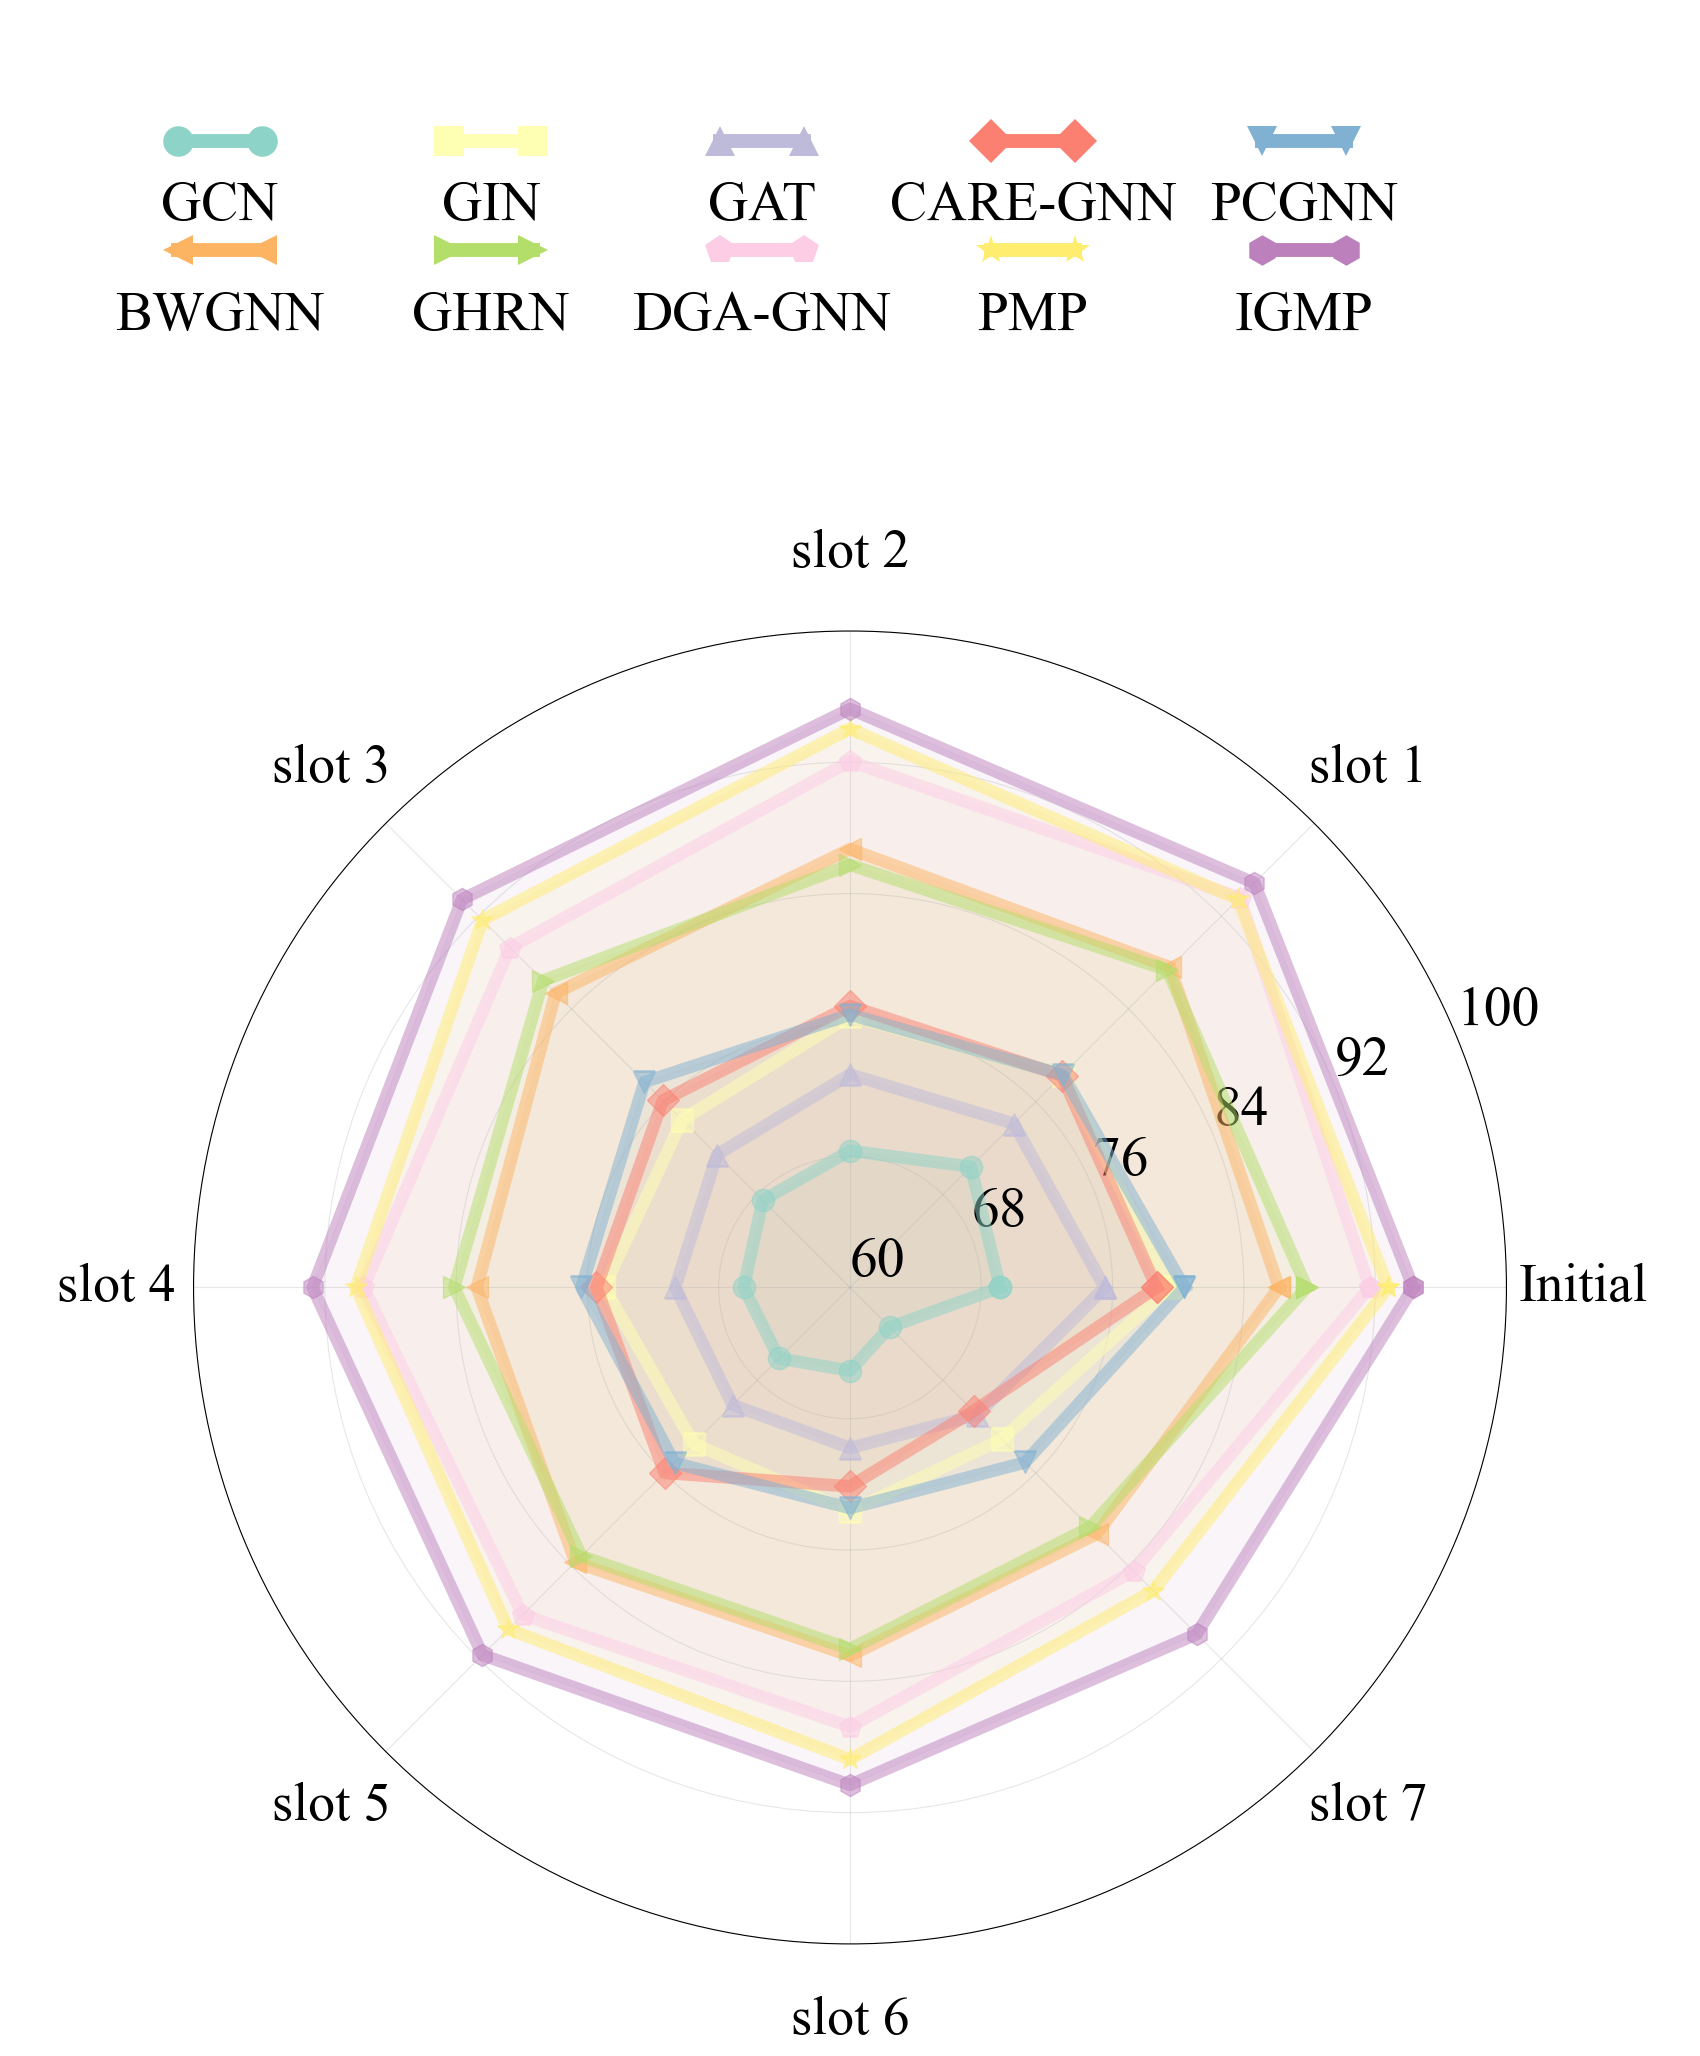

In [22]:
data1={
    'GCN':[69.15,70.41,68.33,67.52,66.48,66.12,65.07,63.42],
    'GIN':[79.47,78.35,76.55,74.45,74.98,73.47,73.65,73.08],
    'GAT':[75.52,74.12,72.98,71.45,70.65,70.12,69.78,70.98],
    'CARE-GNN':[78.68,78.26,77.15,76.12,75.45,75.98,72.12,70.65],
    'PCGNN':[80.38,78.33,76.62,77.71,76.37,75.12,73.45,75.08],
    'BWGNN':[86.14,87.59,86.72,85.37,82.74,83.68,82.44,81.25],
    'GHRN':[87.83,87.35,85.76,86.45,84.12,83.15,82.03,80.67],
    'DGA-GNN':[91.67,93.58,92.07,89.29,89.65,88.21,86.76,84.45],
    'PMP':[92.80,93.44,94.05,91.67,90.12,89.45,88.76,86.14],
    'IGMP':[94.32,94.85,95.26,93.44,92.75,91.67,90.31,89.87]
}
plot_RadarChart(data1)

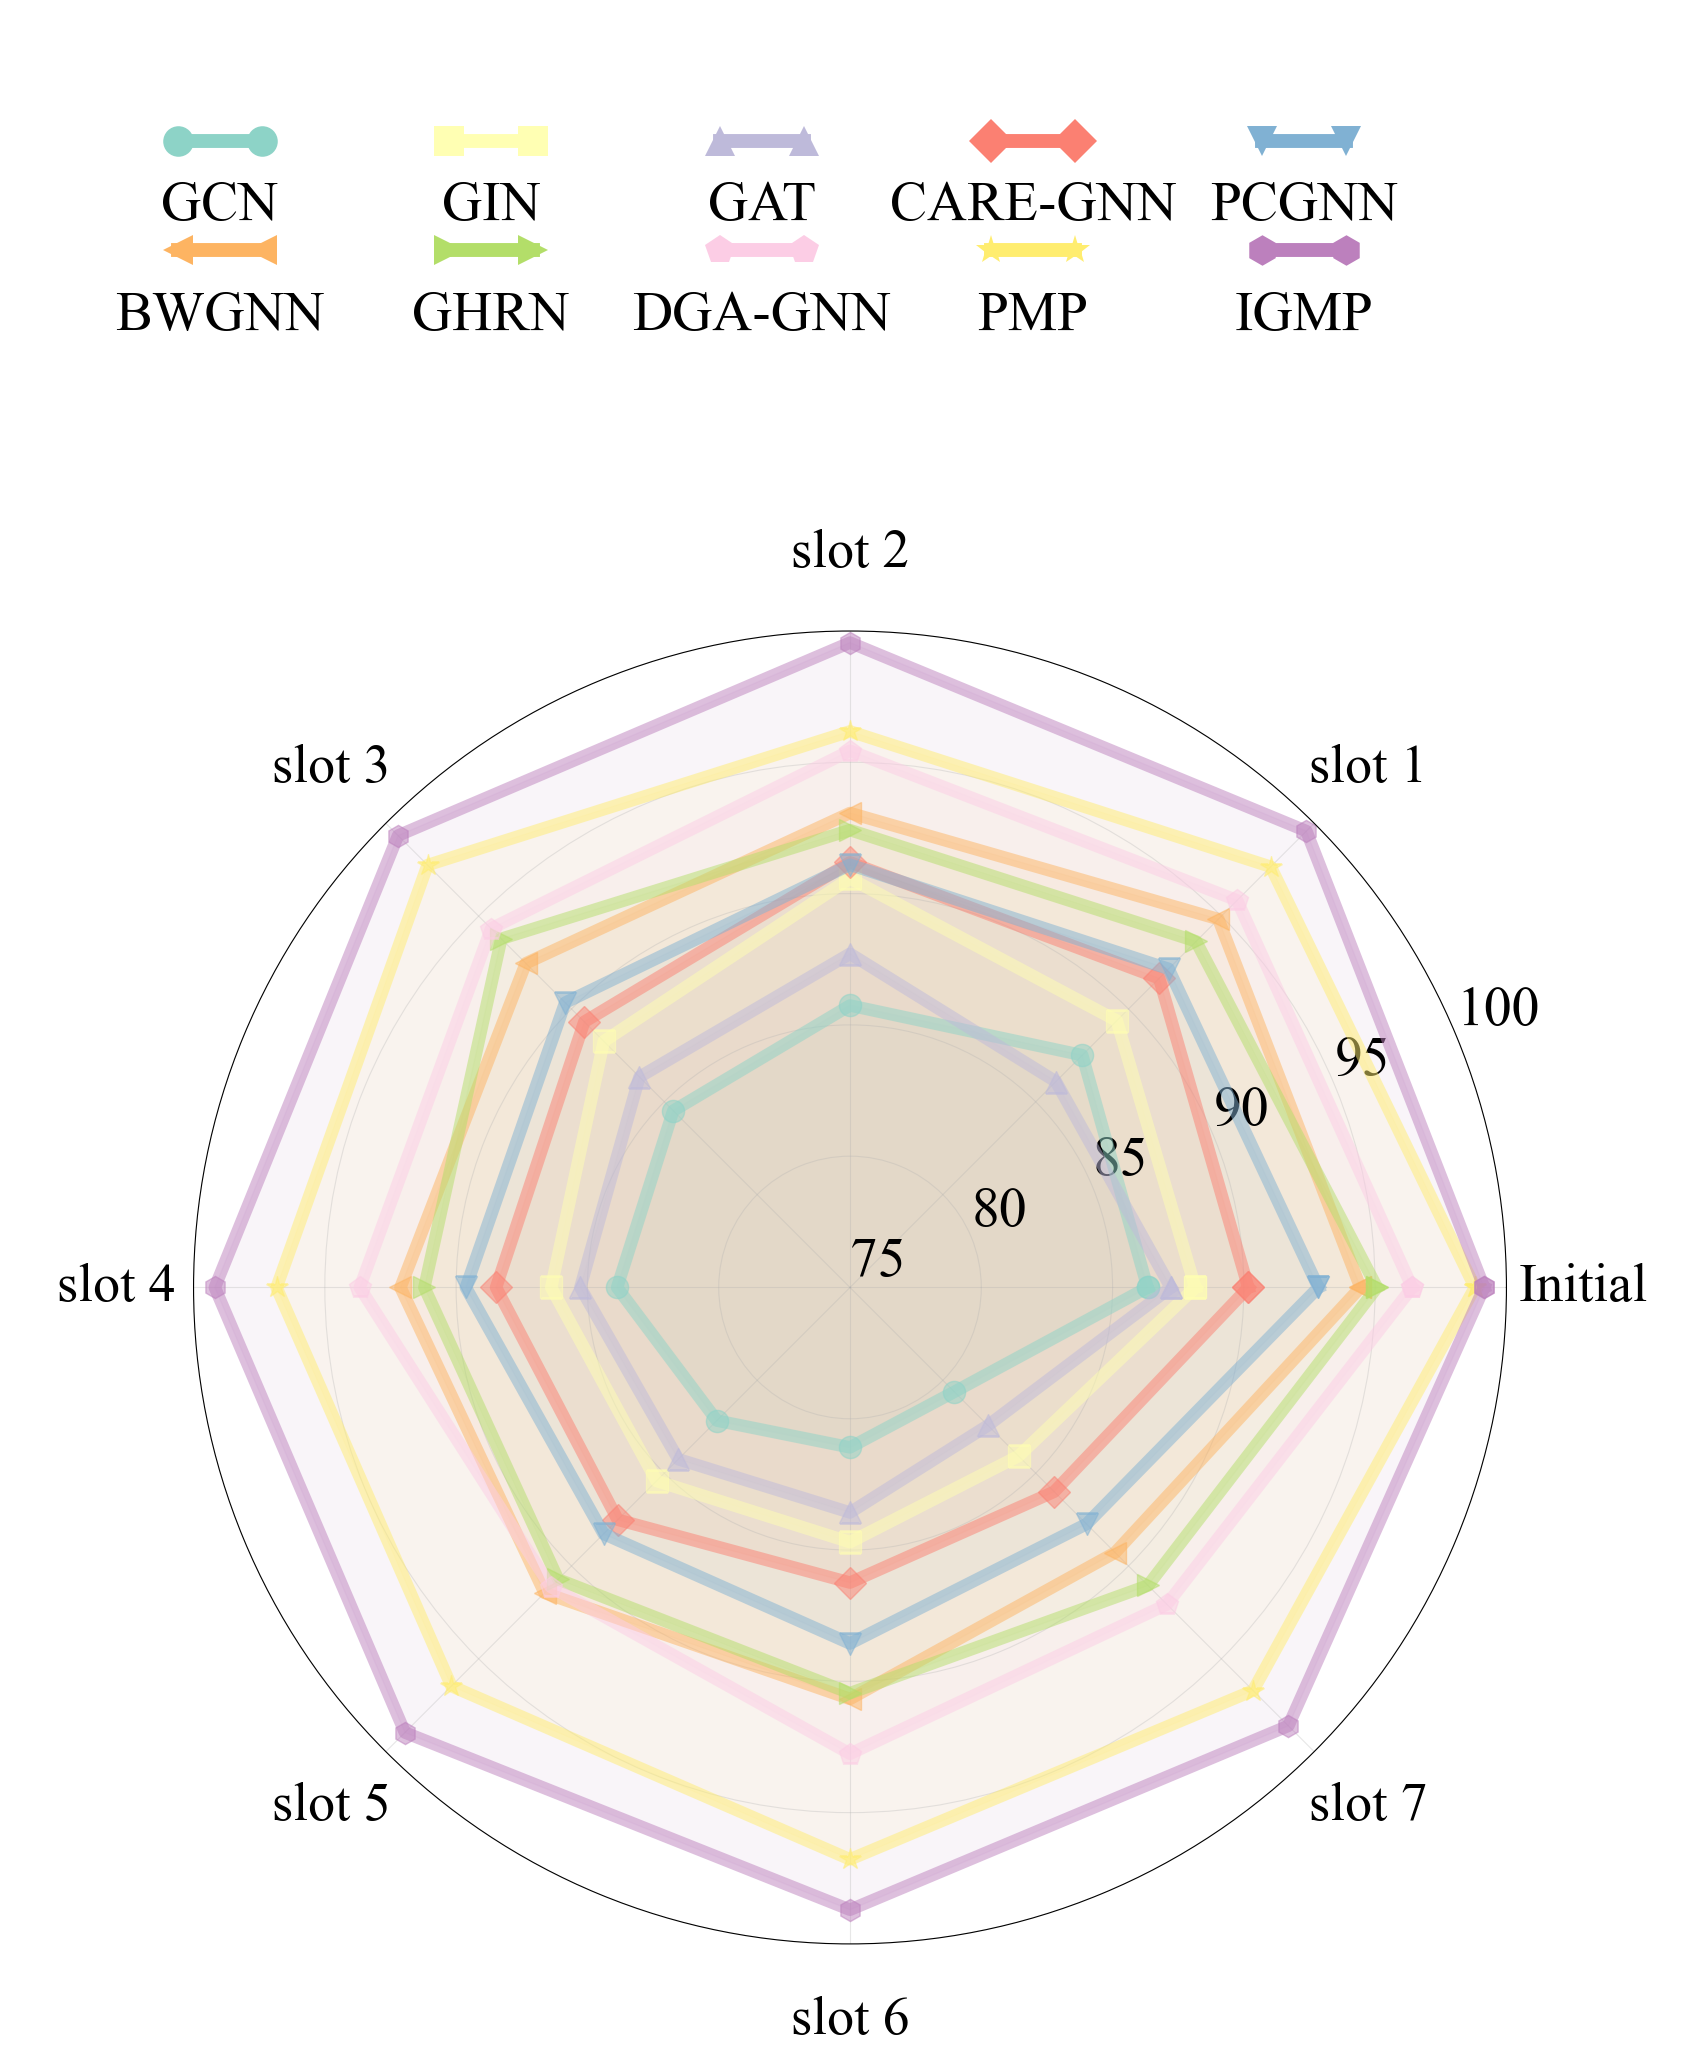

In [23]:
data2={
    'GCN':[86.33,87.51,85.74,84.52,83.87,82.17,81.09,80.62],
    'GIN':[88.15,89.37,90.58,88.26,86.38,85.42,84.70,84.08],
    'GAT':[87.22,86.09,87.71,86.34,85.27,84.25,83.57,82.43],
    'CARE-GNN':[90.17,91.65,91.19,89.31,88.48,87.51,86.24,86.00],
    'PCGNN':[92.84,92.16,91.10,90.34,89.63,88.27,88.56,87.74],
    'BWGNN':[94.44,94.84,93.07,92.46,92.12,91.45,90.67,89.28],
    'GHRN':[95.07,93.64,92.42,93.78,91.21,90.72,90.45,91.05],
    'DGA-GNN':[96.41,95.85,95.44,94.33, 93.67, 91.12, 92.76, 92.07],
    'PMP':[98.80,97.66,96.18,97.75,96.84,96.47,96.78,96.71],
    'IGMP':[99.15,99.58,99.56,99.34,99.19,98.97,98.70,98.61]
}
plot_RadarChart(data2)

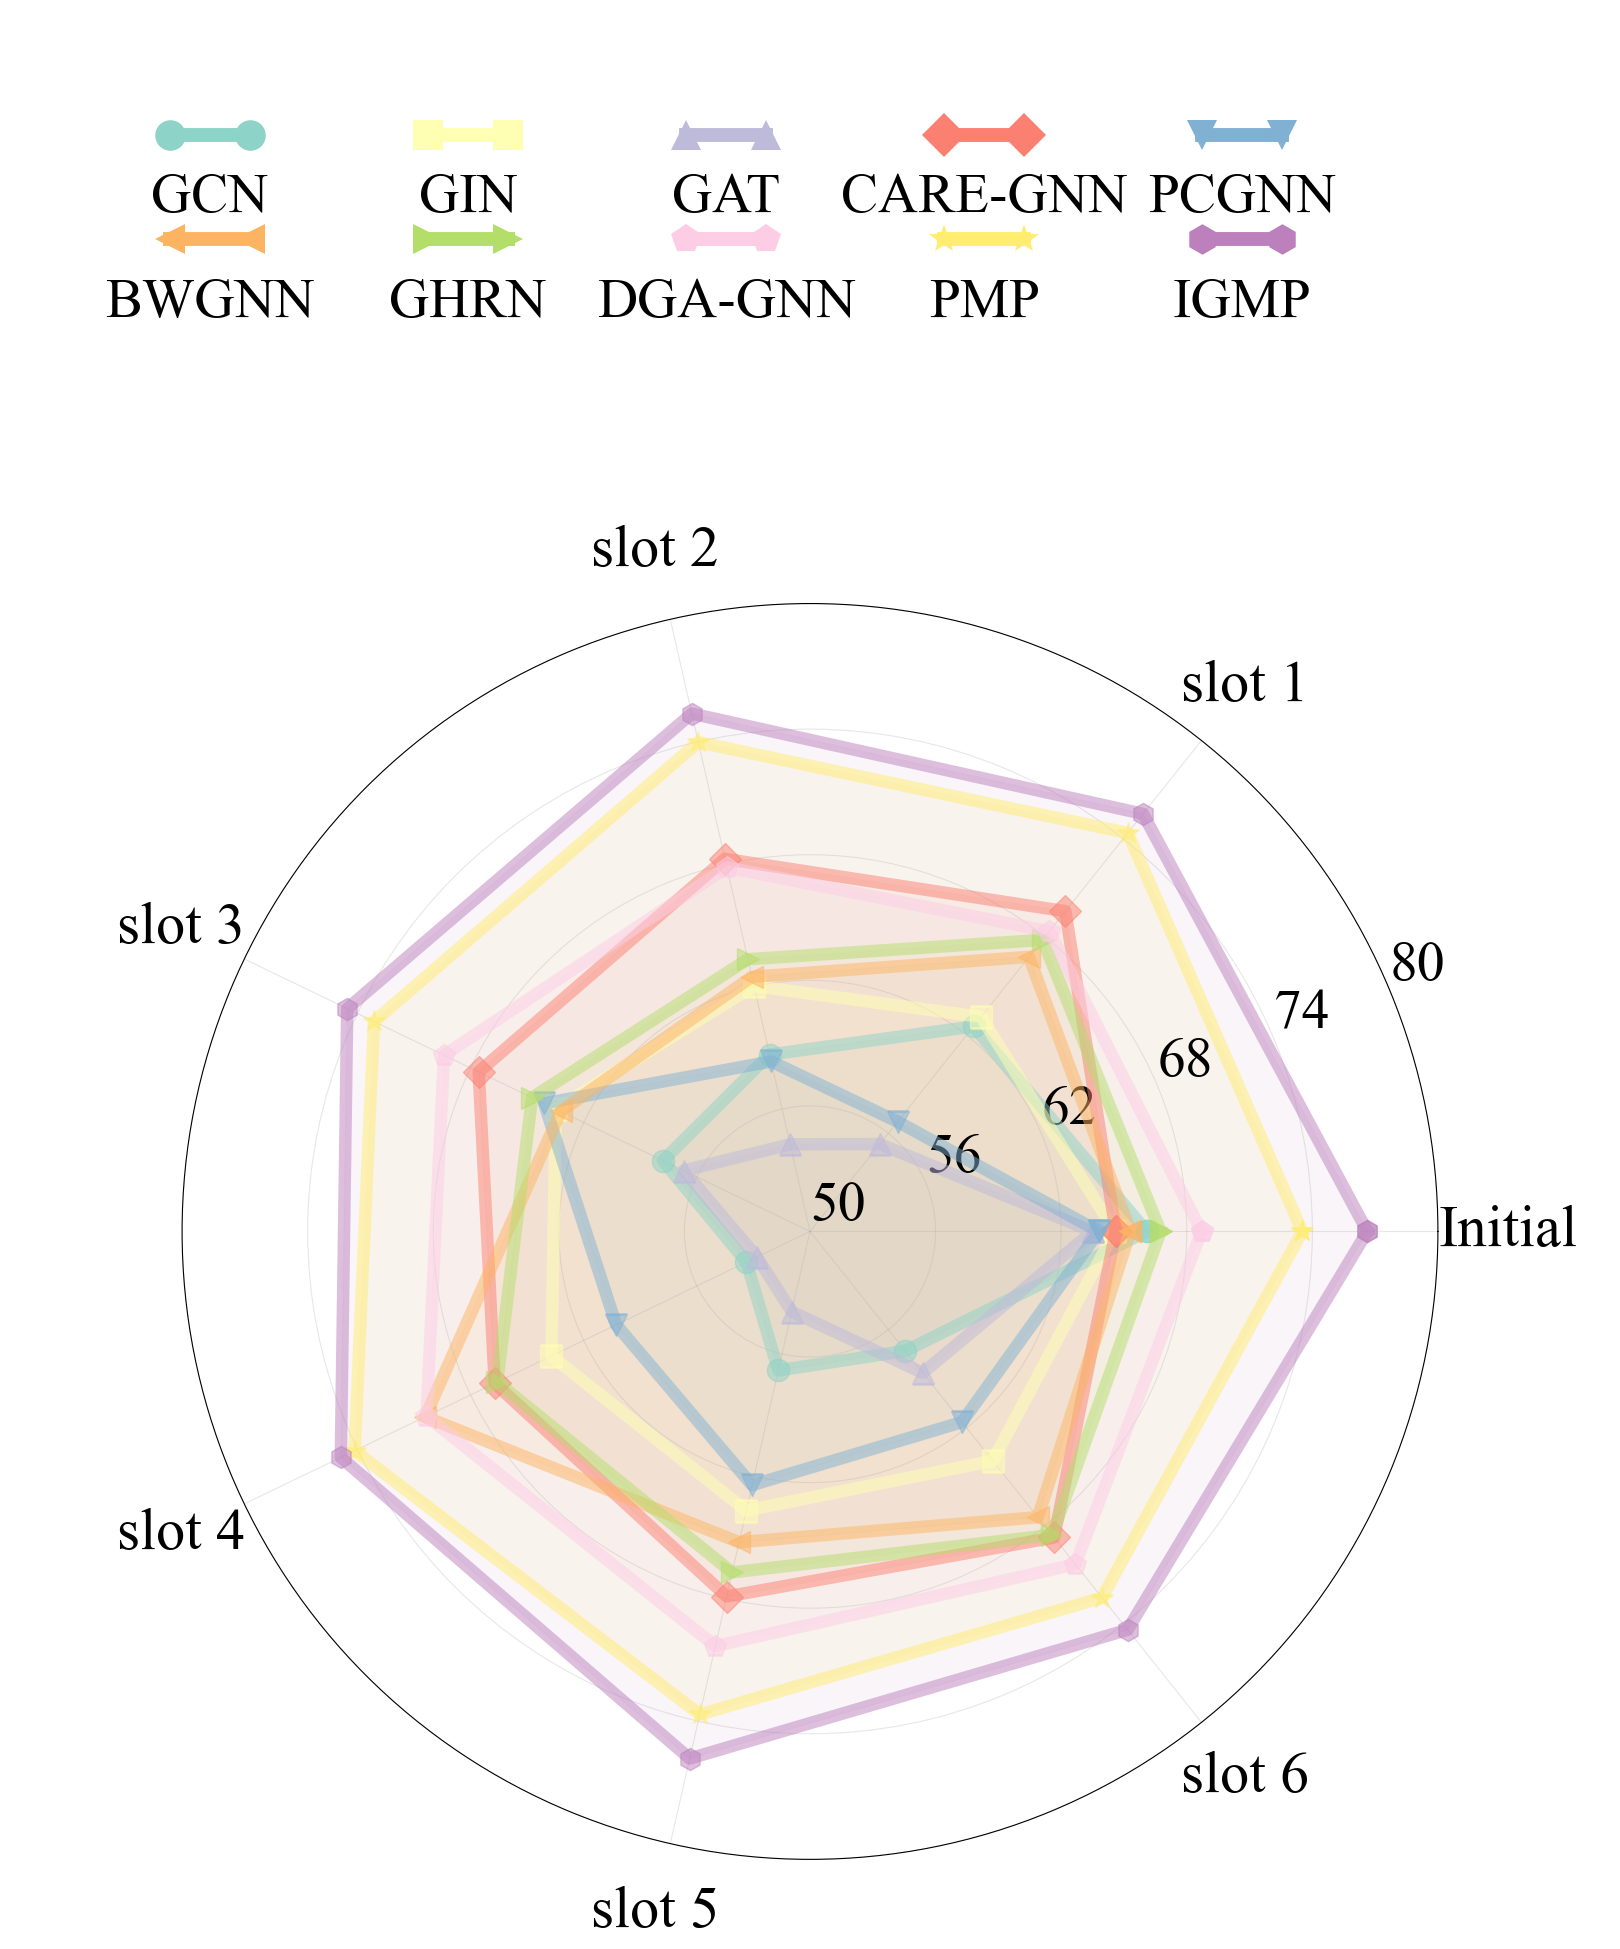

In [24]:
data3={
    'GCN':[66.09,62.53,58.67,57.80,53.37,56.81,57.30],
    'GIN':[64.56,63.11,62.03,63.48,63.71,63.68,64.01],
    'GAT':[63.50,55.34,54.27,56.70,52.81,53.93,58.64],
    'CARE-GNN':[64.61,69.57,68.26,67.57,66.72,67.89,68.70],
    'PCGNN':[63.80,56.71,58.33,64.10,60.28,62.43,61.65],
    'BWGNN':[65.31,66.78,62.48,63.22,70.41,65.23,67.46],
    'GHRN':[66.75,67.82,63.34,64.74,66.59,66.71,68.55],
    'DGA-GNN':[68.71,68.34,67.84,69.41,70.34,70.32,70.34],
    'PMP':[73.52,74.35,73.98,73.12,74.15,73.67,72.38],
    'IGMP':[76.63,75.52,75.38,74.54,74.88,75.83,74.34]
}
plot_RadarChart(data3)